In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pmagpy.ipmag as ipmag #can be pip installed if you don't have it 'pip install pmagpy'
import pmagpy.pmag as pmag
import cartopy.crs as ccrs
#import seaborn as sns
%config InlineBackend.figure_format='retina'
pd.set_option('display.max_rows', None,'display.max_columns', None)

from wmean_utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
current_path = os.getcwd() 
data_path_PP = current_path + "/data/poles_NAM"
file_name = "/NAM_poles_0_130.xlsx"
df = pd.read_excel(data_path_PP + file_name)
# df.columns
df.head(2)

,name,min_age,max_age,age,slat,slon,N,k,alpha95,dp,dm,plat,plon,K,A95,plateID,lithology,Rlat,Rlon,Euler_lat,Euler_lon,Euler_ang,author,Q,reliability,age constraints
0,USGS SW North America composite,0.0,1.0,0.5,36.30,242.13,38,24.7,4.8,NaN,NaN,-86.3,5.7,NaN,NaN,101,volcanic,-86.3,5.7,0.0,0.0,0.0,Mankinen (2008),5,NaN,Brunhes normal chron
1,Michoacan Guanajuato volcanic ﬁeld,0.0,0.6,0.3,19.25,257.67,8,29.0,9.1,8.5,8.5,-84.4,39.9,33.0,8.5,101,volcanic,-86.4,9.2,79.2,23.0,0.2,Maciel Peña et al. (2009),5,NaN,Ar-Ar ages of 82 to 612 ka (from another study)


In [76]:
# df.head(2)
df.columns

Index(['name', 'min_age', 'max_age', 'age', 'slat', 'slon', 'N', 'k',
       'alpha95', 'dp', 'dm', 'plat', 'plon', 'K', 'A95', 'plateID',
       'lithology', 'Rlat', 'Rlon', 'Euler_lat', 'Euler_lon', 'Euler_ang',
       'author', 'Q', 'reliability', 'age constraints'],
      dtype='object')

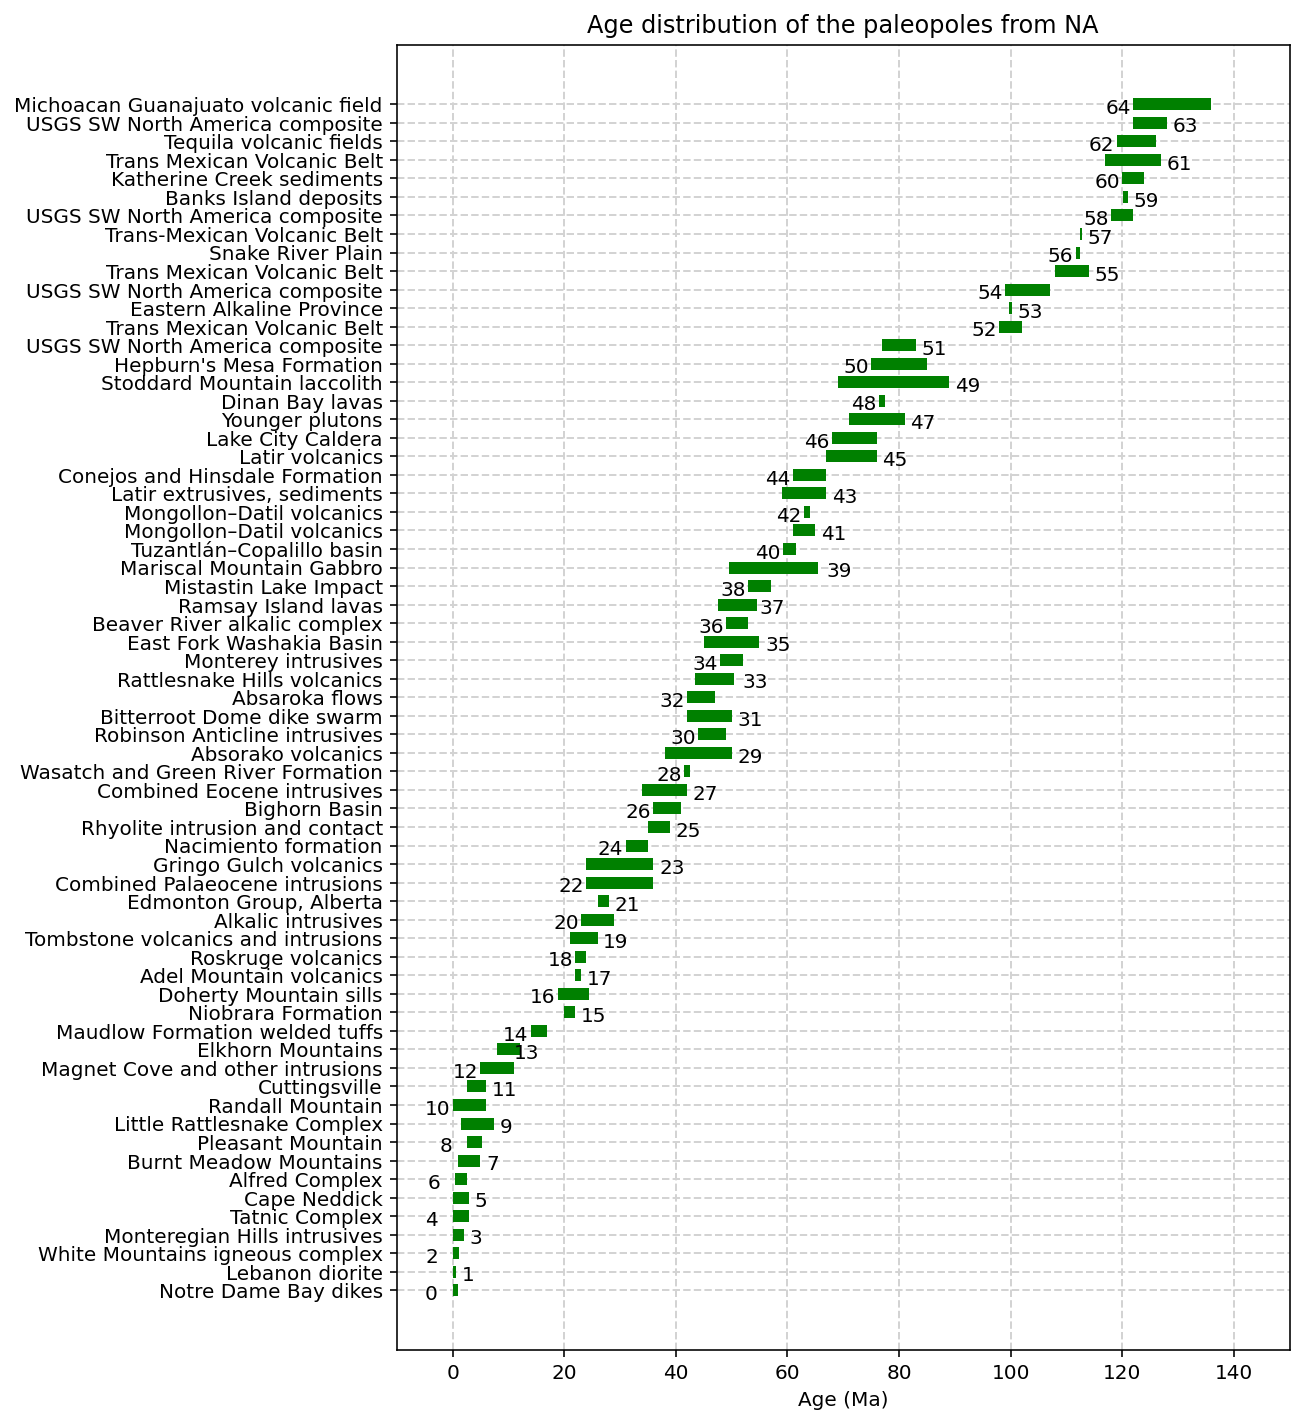

In [117]:
plt.figure(figsize=(8, 12))
ax1 = plt.subplot(111)
elinew = 6
for i, pole in df.iterrows():
    plt.errorbar(pole.age, i+1, yerr=0, xerr=(pole.max_age-pole.min_age)/2, color='g', ecolor=None, elinewidth=elinew, capsize=0, capthick=0, ls='none', label=None)

for i, row in df.iterrows():
    if (i % 2) != 0:
        plt.annotate(f'{row.name}', (row.max_age+1, i+.5))
    else:
        plt.annotate(f'{row.name}', (row.min_age-5, i+.5))

plt.yticks(ticks=np.arange(1,len(df)+1), labels=df.name);

ax1.set_xlim(-10, 150)
plt.xlabel('Age (Ma)')
plt.grid(color='lightgrey', linestyle='--', linewidth=1) 
plt.title('Age distribution of the paleopoles from NA');


In [77]:
####################################
Tinv=10  # Time interval 
window=20  # window size
ageFilter=[0,140]
#epoch=' '
#viewA=[-15,15,0]
A95c = 10.
Wabc = [1,1,1]
Wscale = 2
#Wflag='AgeA95Q'  #need to set this as default in function call
####################################

# preprocess data to sort on time, remove nans, 
df = preprocess_pole_data(df,ageFilter)
df.Plong = df.polesR_lon
df.Plat = df.polesR_lat

df.head(2)

,name,min_age,max_age,age,slat,slon,N,k,alpha95,dp,dm,plat,plon,K,A95,plateID,lithology,Rlat,Rlon,Euler_lat,Euler_lon,Euler_ang,author,Q,reliability,age constraints,polesR_lat,polesR_lon
64,Notre Dame Bay dikes,122.0,136.0,129.0,49.5,304.6,10,180.0,3.6,NaN,NaN,-67.2,30.8,NaN,NaN,101,dykes,-43.6,91.6,64.9,-17.7,58.7,Lapointe (1979),5,"stepwise demag, good structural control",K-Ar of ?,64.153159,101.099153
63,Lebanon diorite,122.0,128.0,125.0,43.4,289.2,5,113.0,7.5,NaN,NaN,-71.0,16.9,NaN,NaN,101,plutonic,-49.4,83.7,65.4,-18.9,56.8,McEnroe (1996b),5,"high-T CHRM, exsolution lamellae and fine reac...",125±3 Ma K-Ar on biotite. They discarded disco...,63.189828,90.291367


In [78]:
# Generate an list that identifies which poles lie within each time window
windowed_poles_list = get_windowed_pole_list(df, Tinv, ageFilter, window)

for windowed_poles in windowed_poles_list:
    print(windowed_poles)
    
# show all poles in a window
win_ind = 2
win_ind_poles = list(windowed_poles_list[win_ind][-1])
df.iloc[win_ind_poles]

(0, -10.0, 10.0, array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]))
(10, 0.0, 20.0, array([48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]))
(20, 10.0, 30.0, array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]))
(30, 20.0, 40.0, array([35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))
(40, 30.0, 50.0, array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]))
(50, 40.0, 60.0, array([22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]))
(60, 50.0, 70.0, array([15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]))
(70, 60.0, 80.0, array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]))
(80, 70.0, 90.0, array([13, 14, 15, 16, 17, 18, 19]))
(90, 80.0, 100.0, array([10, 11, 12, 13, 14, 15, 17]))
(100, 90.0, 110.0, array([ 9, 10, 11, 12]))
(110, 100.0, 120.0, array([ 2,  3,  6,  7,  8,  9, 10, 11, 12]))
(120, 110.0, 130.0, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
(130, 120.0, 140.0, array([0, 1, 2, 3, 4, 5, 6]))


,name,min_age,max_age,age,slat,slon,N,k,alpha95,dp,dm,plat,plon,K,A95,plateID,lithology,Rlat,Rlon,Euler_lat,Euler_lon,Euler_ang,author,Q,reliability,age constraints,polesR_lat,polesR_lon
23,Mongollon–Datil volcanics,24.0,36.0,30.00,33.3,252.1,61,18.1,4.4,4.5,4.5,-81.9,323.6,17.6,4.5,101,volcanic,-83.1,-16.9,77.4,12.5,8.6,Diehl et al. (1988),4,NaN,Ar/Ar ages of 24.3 to 36.2 Ma,80.335850,128.567553
22,Mongollon–Datil volcanics,24.0,36.0,30.00,33.3,252.2,39,22.3,5.0,4.4,6.6,-82.8,316.2,NaN,NaN,101,volcanic,-84.2,-24.0,77.4,12.5,8.6,McIntosh et al. (1992),3,NaN,Ar/Ar ages of 24.3 to 36.2 Ma,81.120839,121.874348
21,"Latir extrusives, sediments",26.0,28.0,27.00,36.8,254.6,57,13.1,5.4,4.9,7.3,-80.2,315.4,NaN,NaN,101,mixed,-81.4,-32.9,78.8,22.7,7.5,Hagstrum and Lipman (1986),4,NaN,26-28 Ma K-Ar ages,78.813762,125.637005
20,Conejos and Hinsdale Formation,23.0,29.0,26.00,37.2,254.4,23,21.0,6.8,6.9,9.7,-79.7,342.6,NaN,NaN,101,volcanic,-80.5,-4.3,79.3,27.5,7.1,Brown and Golombek (1997),4,deemed unreliable by Besse and Courtillot due ...,one K-Ar age of 26 Ma (uncertainty from GPDB a...,78.681518,151.240299
19,Latir volcanics,21.0,26.0,23.50,36.8,254.6,43,18.2,5.2,5.1,7.3,-80.9,331.2,NaN,NaN,101,plutonic,-81.8,-17.8,79.8,27.3,6.4,Hagstrum and Lipman (1986),4,NaN,21-26 Ma K-Ar ages,79.909997,141.639492
18,Lake City Caldera,22.0,24.0,23.00,38.0,252.7,17,19.2,8.4,11.2,13.6,-76.4,30.3,NaN,NaN,101,volcanic,-76.2,41.0,79.9,26.9,6.3,Reynolds et al. (1986),3,NaN,22.2 to 24.0 K-Ar ages,76.361825,-160.459049
17,Younger plutons,22.0,23.0,22.50,36.6,254.5,11,46.9,6.7,6.7,9.5,-87.1,189.5,NaN,NaN,101,plutonic,-86.7,177.4,80.0,26.6,6.2,Hagstrum and Johnson (1986),4,NaN,22 to 23 Ma K-Ar and fission-track ages,87.276622,25.149671
16,Dinan Bay lavas,18.9,24.4,21.65,53.7,227.3,13,36.0,7.0,9.8,9.8,-82.7,301.7,19.0,9.8,101,volcanic,-83.7,-51.0,80.2,26.0,6.0,Irving et al. (2000),5,less reliable according to authors,K-Ar ages between 18.9 and 24.4 Ma,81.680224,115.452833
15,Stoddard Mountain laccolith,20.0,22.0,21.00,37.6,246.6,19,82.2,3.7,NaN,NaN,-82.9,346.2,NaN,NaN,101,plutonic,-83.5,-1.3,80.3,25.4,5.8,Petronis et al. (2004),5,NaN,20-22 Ma K-Ar and Ar/Ar ages,82.211959,155.168117
14,Hepburn's Mesa Formation,14.0,17.0,15.50,45.3,249.2,144,51.9,12.9,13.5,18.6,-81.1,225.3,NaN,NaN,101,clastics,-82.4,98.8,80.9,23.2,4.2,Burbank and Barnosky (1990),3,NaN,"16.8 Ma to 14.3 (or 13.8) Ma, constrained by m...",80.851439,45.031656


In [113]:

# calculate weighted running means
df_fishm, df_weightm = weighted_APWP(df, windowed_poles_list, A95c, Wscale, Wabc)


In [81]:
df_weightm

,AgeWinM,Plong,Plat,e95a,e95b,omega,kx,ky,N
0,0,-52.712734,-87.727218,6.589187,6.509212,170.205580,18.667507,18.217110,14
1,10,-64.882648,-87.500364,6.218608,6.201787,176.285438,18.339203,18.240124,16
2,20,-30.200046,-84.240529,8.115593,7.785521,-124.496869,18.336109,16.874933,11
3,30,-23.539533,-83.088033,6.934404,6.726966,-97.751950,18.591774,17.496091,14
4,40,-25.858586,-81.735618,6.455003,6.341510,142.548568,18.429533,17.787165,16
5,50,-21.837914,-80.522175,6.483976,6.353626,-151.089347,18.046281,17.327991,16
6,60,-3.682642,-77.008065,7.183288,6.678778,38.955094,18.250410,15.776842,15
7,70,-170.131151,75.667765,7.443019,6.961174,167.063169,18.410363,16.103826,13
8,80,-164.964854,74.716196,10.259169,9.288378,172.223868,18.253332,14.962273,7
9,90,-167.168023,74.807184,11.562678,10.425077,156.432612,18.235222,14.823567,7


In [105]:
def plot_wmean(df_wmean):
    h1 = plt.scatter(df_wmean.Plong.tolist(), df_wmean.Plat.tolist(), c=df_wmean.AgeWinM.tolist(), 
                cmap=plt.cm.get_cmap('jet', len(df_wmean.AgeWinM.tolist())),
                s=30, marker='o',edgecolors='k', alpha=.8, transform=ccrs.PlateCarree())
    colors = plt.cm.jet(np.linspace(0, .5, len(df_wmean)))
    for i, row in df_wmean.iterrows():
        X, Y = create_ellipse(row.Plong, row.Plat, row.e95a, row.e95b, 0, n=60)
        plt.plot(X, Y, color=colors[i], linestyle='-', linewidth=1, alpha=.8, transform=ccrs.Geodetic())



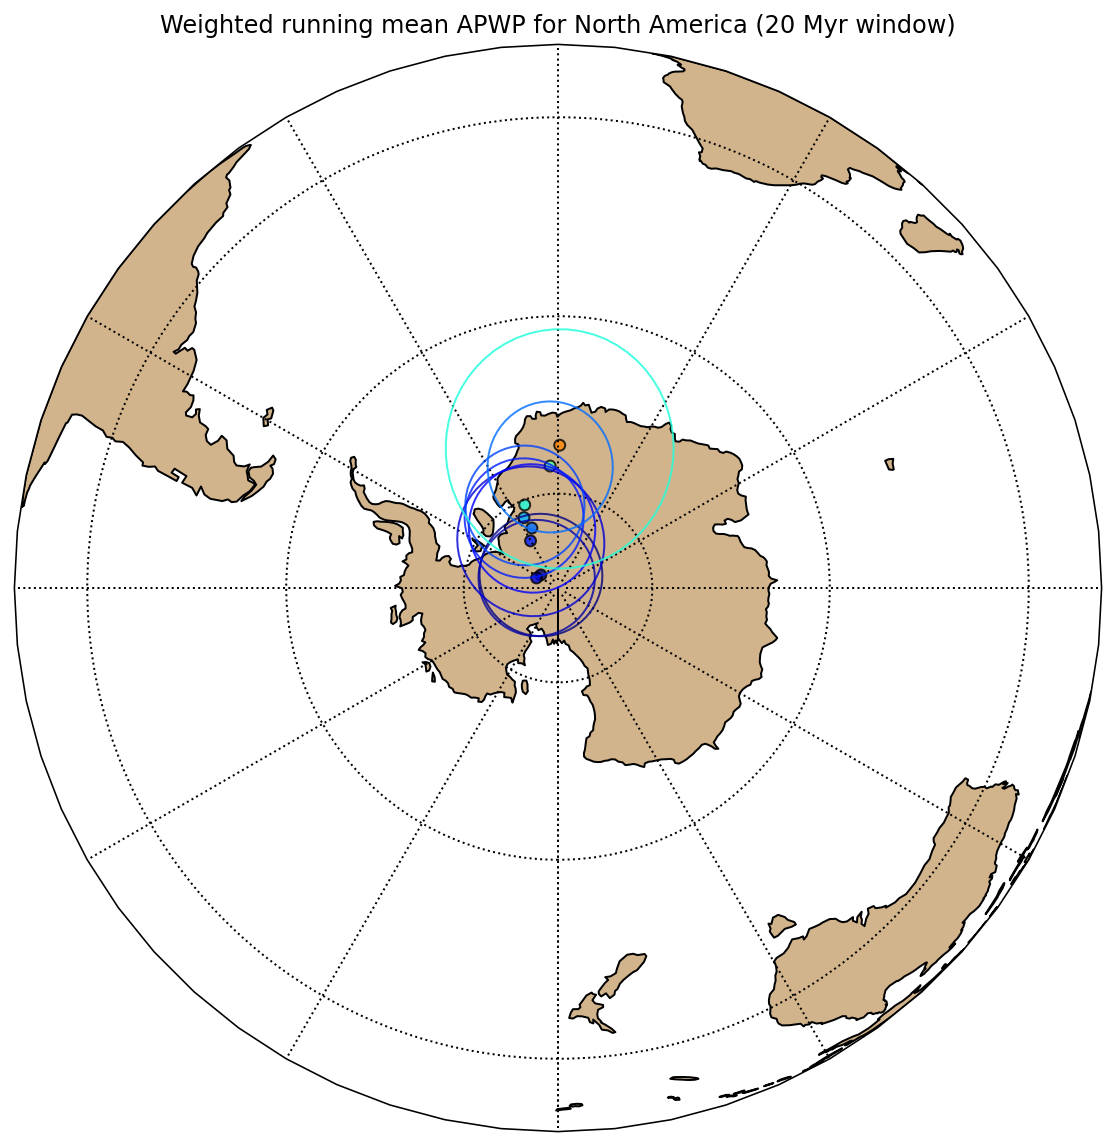

In [106]:
map_axis = ipmag.make_orthographic_map(central_longitude=0, central_latitude=-90, figsize=(10,10))
# ipmag.plot_poles_colorbar(map_axis, NA_RM_20_10.plon.tolist(), NA_RM_20_10.plat.tolist(), 
#                  NA_RM_20_10.alpha95.tolist(), NA_RM_20_10.age.tolist(),0,130)
plot_wmean(df_weightm)
plt.title('Weighted running mean APWP for North America (20 Myr window)')
plt.show()